<a href="https://colab.research.google.com/github/AlanEbenezer/Project-Folder/blob/main/MentalHealthProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("depression_data.csv")

In [ ]:
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [ ]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


In [ ]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
age_std_deviation = df['Age'].std()

In [ ]:
age_mean

49.00071295991957

In [ ]:
age_median

49.0

In [ ]:
age_std_deviation

18.158759370459084

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
total_sum_of_mental_illness = df[df["History of Mental Illness"] == "Yes"].count()

In [ ]:
total_sum_of_mental_illness_not= df[df["History of Mental Illness"] == "No"].count()

Text(0.5, 1.0, 'Percent of people that have History of Mental Illness')

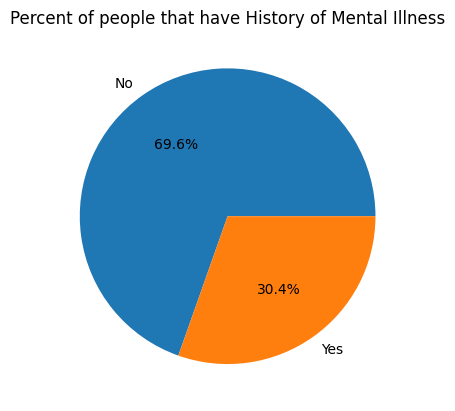

In [ ]:
df.groupby("History of Mental Illness").size().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Percent of people that have History of Mental Illness')

In [ ]:
history_of_Alcohol_Consumption_size = df.groupby("Alcohol Consumption").size()

In [ ]:
history_of_mental_health_size = df.groupby("History of Mental Illness").size()

In [ ]:
contingency_table = pd.crosstab(df["Alcohol Consumption"],df["History of Mental Illness"])

Text(0, 0.5, 'Number of people with Mental Illness History')

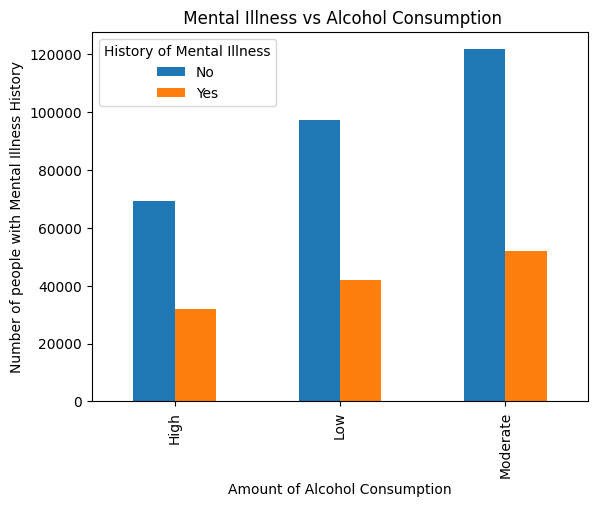

In [ ]:
contingency_table.plot(kind = 'bar' )
plt.title(' Mental Illness vs Alcohol Consumption')
plt.xlabel('Amount of Alcohol Consumption')
plt.ylabel('Number of people with Mental Illness History')

In [ ]:
contingency_table2 = pd.crosstab(df["Alcohol Consumption"],df["History of Mental Illness"])
contingency_table2['Ratio'] = contingency_table2['Yes'] / (contingency_table2['Yes'] + contingency_table2['No'])

Text(0, 0.5, 'Ratio of Mental Illness')

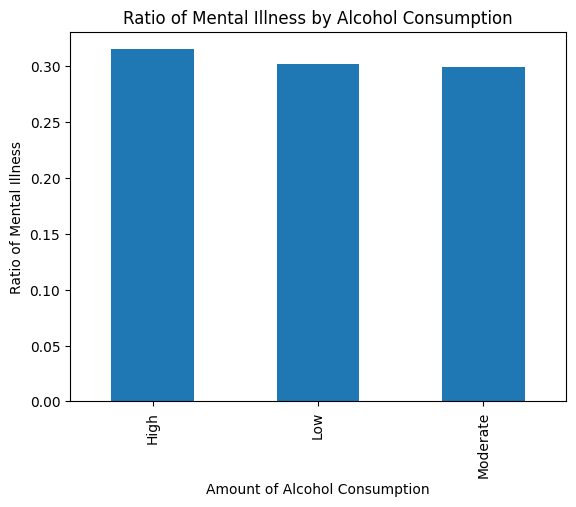

In [ ]:
contingency_table2['Ratio'].plot(kind = 'bar' )
plt.title('Ratio of Mental Illness by Alcohol Consumption')
plt.xlabel('Amount of Alcohol Consumption')
plt.ylabel('Ratio of Mental Illness')

In [ ]:
contingency_table3 = pd.crosstab(df['Employment Status'],df["History of Mental Illness"])
contingency_table3['Ratio'] = contingency_table3['Yes'] / (contingency_table3['Yes'] + contingency_table3['No'])

In [ ]:
#contingency_table5.plot(kind = 'bar' )
#plt.title('Emplyoment Status vs Number of people that have history of Mental Illness')
#plt.xlabel('Employment Status')
#plt.ylabel('Number of People')

Text(0.5, 0, 'Employment Status')

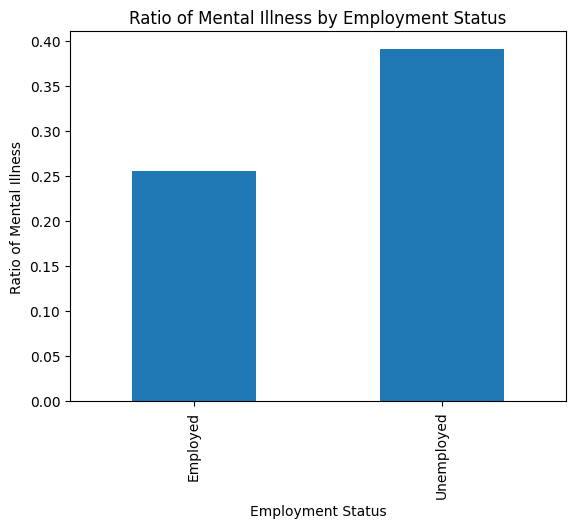

In [ ]:
contingency_table3['Ratio'].plot(kind = 'bar' )
plt.ylabel('Ratio of Mental Illness')
plt.title('Ratio of Mental Illness by Employment Status')
plt.xlabel('Employment Status')

In [ ]:
income_bins = [0, 20000, 40000, 60000, 80000, 100000, df["Income"].max()]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k+']
df['Income Group'] = pd.cut(df['Income'], bins = income_bins, labels = income_labels, include_lowest = True)

In [ ]:
contingency_table4 = pd.crosstab(df["Income Group"],df["History of Mental Illness"])

Text(0.5, 1.0, 'Comparing differences of population of History of Mental Illness between Income Groups')

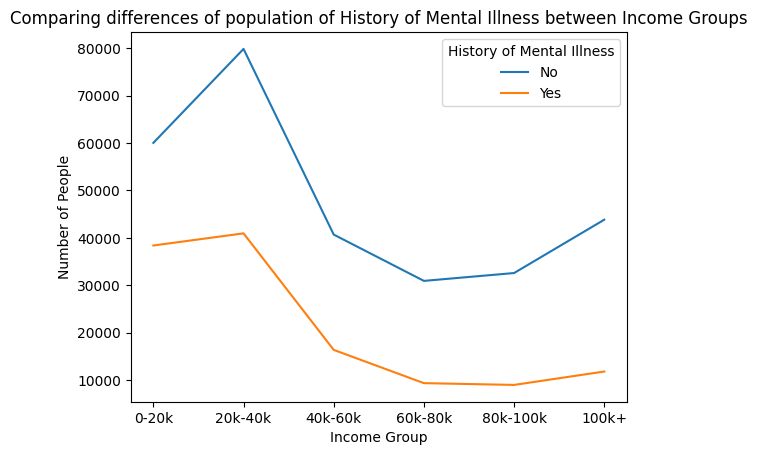

In [ ]:
contingency_table4.plot(kind = 'line' )
plt.ylabel('Number of People')
plt.xlabel('Income Group')
plt.title('Comparing differences of population of History of Mental Illness between Income Groups')

In [ ]:
contingency_table5 = pd.crosstab(df["Employment Status"],df["History of Mental Illness"])

Text(0, 0.5, 'Ratio of Mental Illness')

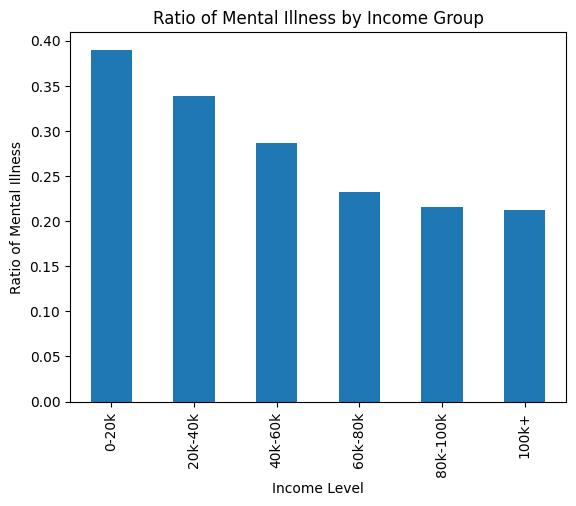

In [ ]:
contingency_table6 = pd.crosstab(df["Income Group"], df["History of Mental Illness"])
contingency_table6['Ratio'] = contingency_table6['Yes'] / (contingency_table6['Yes'] + contingency_table6['No'])
contingency_table6['Ratio'].plot(kind='bar')
plt.title('Ratio of Mental Illness by Income Group')
plt.xlabel('Income Level')
plt.ylabel('Ratio of Mental Illness')

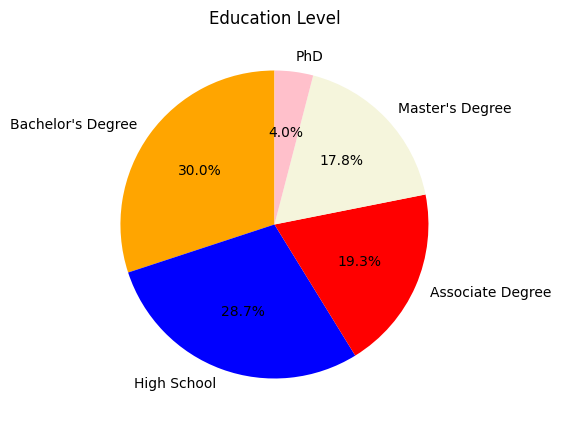

In [ ]:
plt.figure(figsize = (5,5))
df["Education Level"].value_counts().plot.pie(autopct="%1.1f%%", startangle = 90,
                                      colors = ['orange','blue','red','beige',"pink"])
plt.title("Education Level")
plt.ylabel("")
plt.show()

Text(0, 0.5, 'Ratio of Mental Illness')

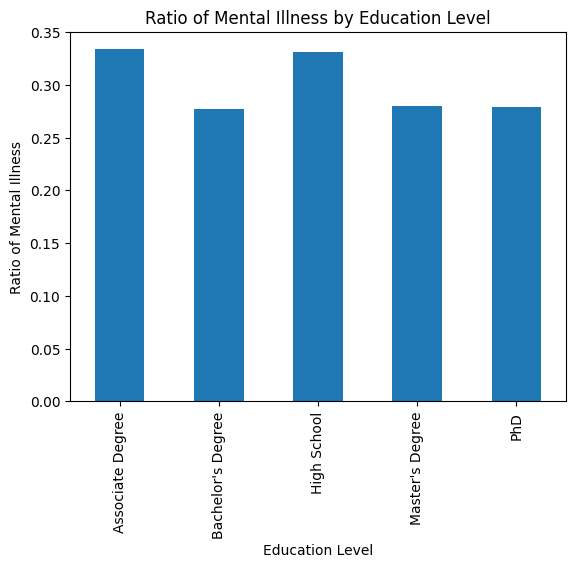

In [ ]:
contingency_table7 = pd.crosstab(df["Education Level"], df["History of Mental Illness"])
contingency_table7['Ratio'] = contingency_table7['Yes'] / (contingency_table7['Yes'] + contingency_table7['No'])
contingency_table7['Ratio'].plot(kind='bar')
plt.title('Ratio of Mental Illness by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Ratio of Mental Illness')

In [ ]:
df.columns

Index(['Name', 'Age', 'Marital Status', 'Education Level',
       'Number of Children', 'Smoking Status', 'Physical Activity Level',
       'Employment Status', 'Income', 'Alcohol Consumption', 'Dietary Habits',
       'Sleep Patterns', 'History of Mental Illness',
       'History of Substance Abuse', 'Family History of Depression',
       'Chronic Medical Conditions'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Marital Status,0
Education Level,0
Number of Children,0
Smoking Status,0
Physical Activity Level,0
Employment Status,0
Income,0
Alcohol Consumption,0


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
Y = label_encoder.fit_transform(df['History of Mental Illness'])

In [ ]:
y = Y

In [ ]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
df['History of Mental Illness'].head(10)

,History of Mental Illness
0,Yes
1,Yes
2,No
3,No
4,Yes
5,No
6,No
7,No
8,No
9,Yes


In [ ]:
df['History of Substance Abuse'] = label_encoder.fit_transform(df['History of Substance Abuse'])

In [ ]:
df['Chronic Medical Conditions'] = label_encoder.fit_transform(df['Chronic Medical Conditions'])

In [ ]:
df['Alcohol Consumption'] = label_encoder.fit_transform(df['Alcohol Consumption'])

In [ ]:
data_features = ['Age', 'Income', 'Alcohol Consumption', 'History of Substance Abuse', 'Chronic Medical Conditions']

In [ ]:
X = df[data_features]

In [ ]:
X.describe()

,Age,Income,Alcohol Consumption,History of Substance Abuse,Chronic Medical Conditions
count,413768.000000,413768.000000,413768.000000,413768.000000,413768.000000
mean,49.000713,50661.707971,1.174885,0.311498,0.329187
std,18.158759,40624.100565,0.795535,0.463106,0.469919
min,18.000000,0.410000,0.000000,0.000000,0.000000
25%,33.000000,21001.030000,1.000000,0.000000,0.000000
50%,49.000000,37520.135000,1.000000,0.000000,0.000000
75%,65.000000,76616.300000,2.000000,1.000000,1.000000
max,80.000000,209995.220000,2.000000,1.000000,1.000000


In [ ]:
X.head()

,Age,Income,Alcohol Consumption,History of Substance Abuse,Chronic Medical Conditions
0,31,26265.67,2,0,1
1,55,42710.36,0,0,1
2,78,125332.79,1,0,0
3,58,9992.78,2,0,0
4,18,8595.08,1,0,1


In [ ]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.6 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import DecisionTreeClassifier
from lightgbm import LGBMClassifier
MentalHealth_modelXG = xgb.XGBClassifier()
MentalHealth_modelRF = RandomForestClassifier()
MentalHealth_modelLGBM = LGBMClassifier()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_test.fillna(X_test.mean(), inplace=True)

In [ ]:
X_train.shape, X_test.shape

((277224, 5), (136544, 5))

In [ ]:
MentalHealth_modelXG.fit(X_train, y_train)
MentalHealth_modelRF.fit(X_train, y_train)
MentalHealth_modelLGBM.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 84203, number of negative: 193021
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 277224, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.303736 -> initscore=-0.829568
[LightGBM] [Info] Start training from score -0.829568


LGBMClassifier()

In [ ]:

y_pred_XG = MentalHealth_modelXG.predict(X_test)
y_pred_RF = MentalHealth_modelRF.predict(X_test)
y_pred_LGBM = MentalHealth_modelLGBM.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees, XG  : {0:0.4f}'. format(accuracy_score(y_test, y_pred_XG)))
print('Model accuracy score with 10 decision-trees, RandomForest : {0:0.4f}'. format(accuracy_score(y_test, y_pred_RF)))
print('Model accuracy score with 10 decision-trees, LightGBM : {0:0.4f}'. format(accuracy_score(y_test, y_pred_LGBM)))

Model accuracy score with 10 decision-trees, XG  : 0.6943
Model accuracy score with 10 decision-trees, RandomForest : 0.5977
Model accuracy score with 10 decision-trees, LightGBM : 0.6951


In [ ]:
feature_scores_XG = pd.Series(MentalHealth_modelXG.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_RF = pd.Series(MentalHealth_modelRF.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_LGBM = pd.Series(MentalHealth_modelLGBM.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores_XG


,0
Income,0.469257
Age,0.149059
Alcohol Consumption,0.138021
History of Substance Abuse,0.136630
Chronic Medical Conditions,0.107035


In [ ]:
feature_scores_RF

,0
Income,0.887001
Age,0.101914
Alcohol Consumption,0.005079
History of Substance Abuse,0.003171
Chronic Medical Conditions,0.002835


In [ ]:
feature_scores_LGBM

,0
Income,1261
Age,1130
Alcohol Consumption,278
Chronic Medical Conditions,184
History of Substance Abuse,147
